
# Analyzing Loan Data

In this notebook I'm going to analyze a dataset about loan data. The data is taken from [Kaggle](https://www.kaggle.com/zhijinzhai/loandata "Kaggle").

My goal is to analyze, explore and visualize data using python libraries pandas, numpy, matplotlib and seaborn.





## Importing libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data exploration or getting familiar with the data

I start by running some common methods in order to explore the data.

In [2]:
ld = pd.read_csv('Loandata.csv')

In [3]:
ld.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [4]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.0+ KB


## Data type issue


Looking at the data types there are 3 columns which have been imported as object types but should be date types instead (effective_date, due_date and paid_off_time).

In the next cell I'm correcting the date format for those 3 columns.

In [5]:
ld['effective_date'] = pd.to_datetime(ld['effective_date'])
ld['due_date'] = pd.to_datetime(ld['due_date'])
ld['paid_off_time'] = pd.to_datetime(ld['paid_off_time'])

Verifying that it worked:

In [6]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null datetime64[ns]
due_date          500 non-null datetime64[ns]
paid_off_time     400 non-null datetime64[ns]
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: datetime64[ns](3), float64(1), int64(3), object(4)
memory usage: 43.0+ KB


## Describe + histogram


Moving one with the analysis: next I'm going to take a closer look into the numeric variables with the describe and histogram methods:

In [7]:
ld.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [8]:
ld.hist(bins=30, figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae34876908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fae3280c400>]], dtype=object)

## Taking a closer look at the loan_status

From a bank perspective, the loan_status column should be the single most interesting column. At the end of the day, it all comes down to whether the loan is paid or not.

In the next few cells I'm going to do some more data exploration with emphasis on the loan_status column.

In [9]:
ld.groupby('loan_status').count()

,Loan_ID,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
loan_status,,,,,,,,,,
COLLECTION,100,100,100,100,100,0,100,100,100,100
COLLECTION_PAIDOFF,100,100,100,100,100,100,100,100,100,100
PAIDOFF,300,300,300,300,300,300,0,300,300,300


Text(0.5,1,'Distribution of Education by Loan Status')

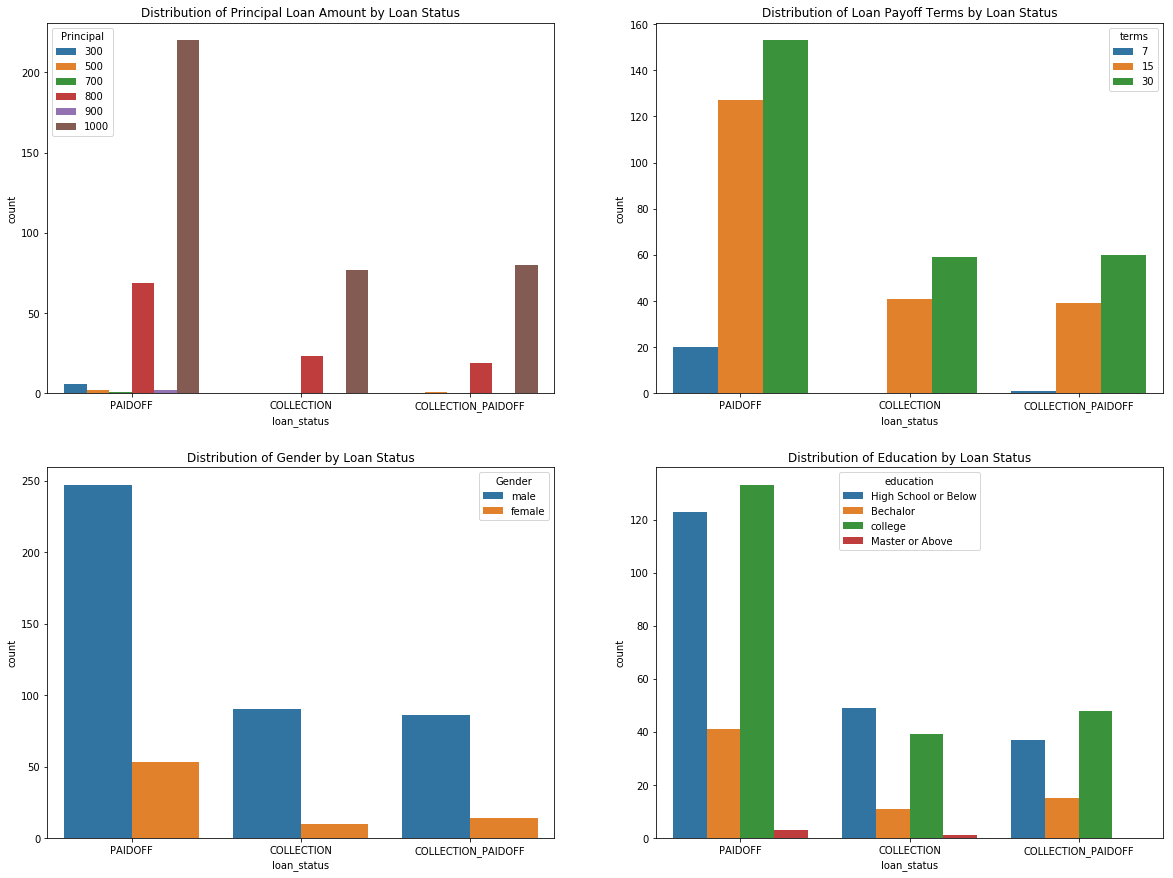

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(20,15))

sns.countplot(x = "loan_status",hue = "Principal", data=ld,ax=axs[0][0])
axs[0][0].set_title("Distribution of Principal Loan Amount by Loan Status")

sns.countplot(x = "loan_status",hue = "terms", data=ld,ax=axs[0][1])
axs[0][1].set_title("Distribution of Loan Payoff Terms by Loan Status")

sns.countplot(x = "loan_status",hue = "Gender", data=ld,ax=axs[1][0])
axs[1][0].set_title("Distribution of Gender by Loan Status")

sns.countplot(x = "loan_status",hue = "education", data=ld, ax=axs[1][1])
axs[1][1].set_title("Distribution of Education by Loan Status")

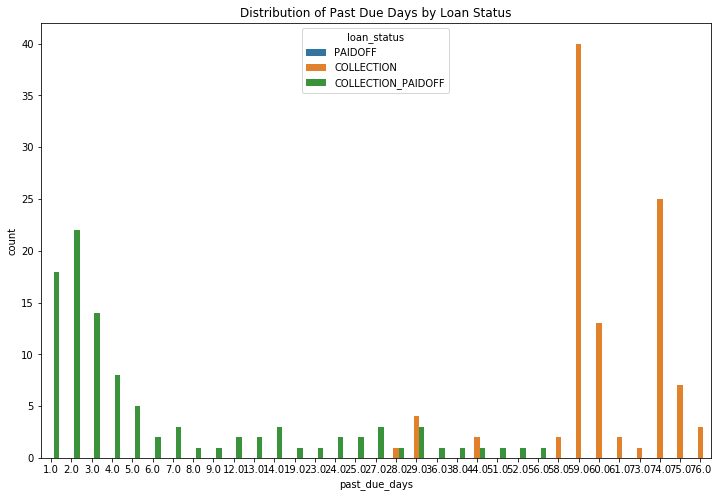

In [16]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Past Due Days by Loan Status')
sns.countplot(x='past_due_days',hue='loan_status', data=ld)

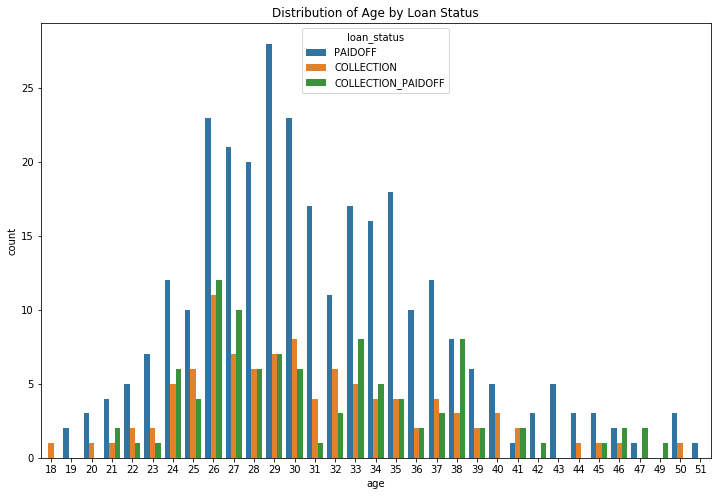

In [17]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Age by Loan Status')
sns.countplot(x='age',hue='loan_status', data=ld)

## The dates

Finally, lets's also look at the date columns.

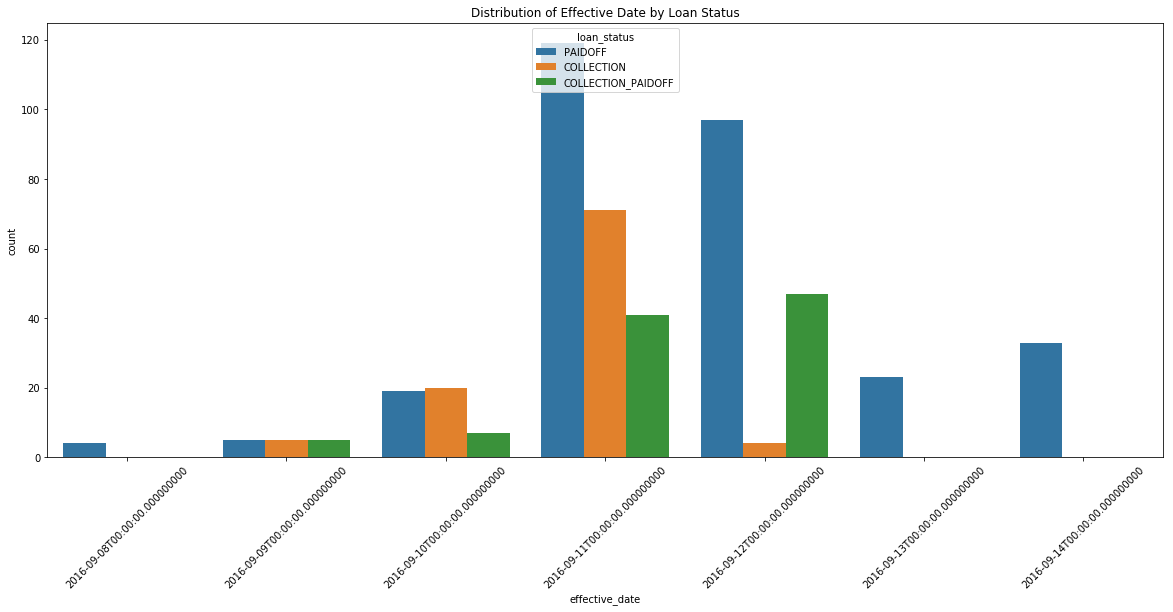

In [18]:
plt.figure(figsize=(20,8))
plt.title('Distribution of Effective Date by Loan Status')
plt.xticks(rotation=45)
sns.countplot(x='effective_date',hue='loan_status', data=ld)

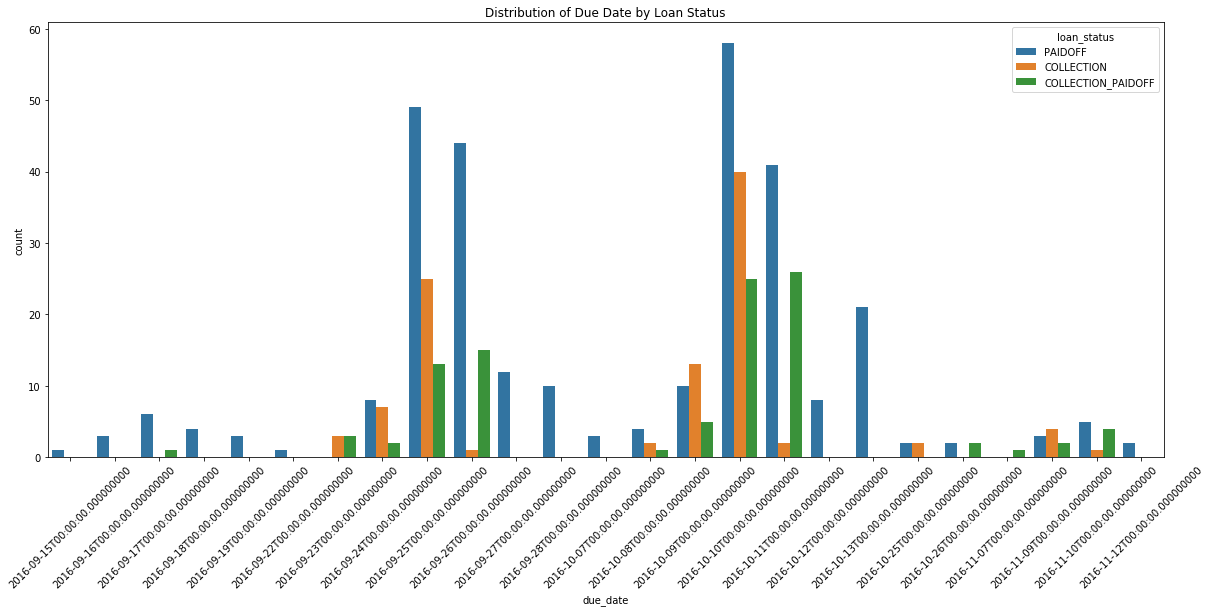

In [19]:
plt.figure(figsize=(20,8))
plt.title('Distribution of Due Date by Loan Status')
plt.xticks(rotation=45)
sns.countplot(x='due_date',hue='loan_status', data=ld)

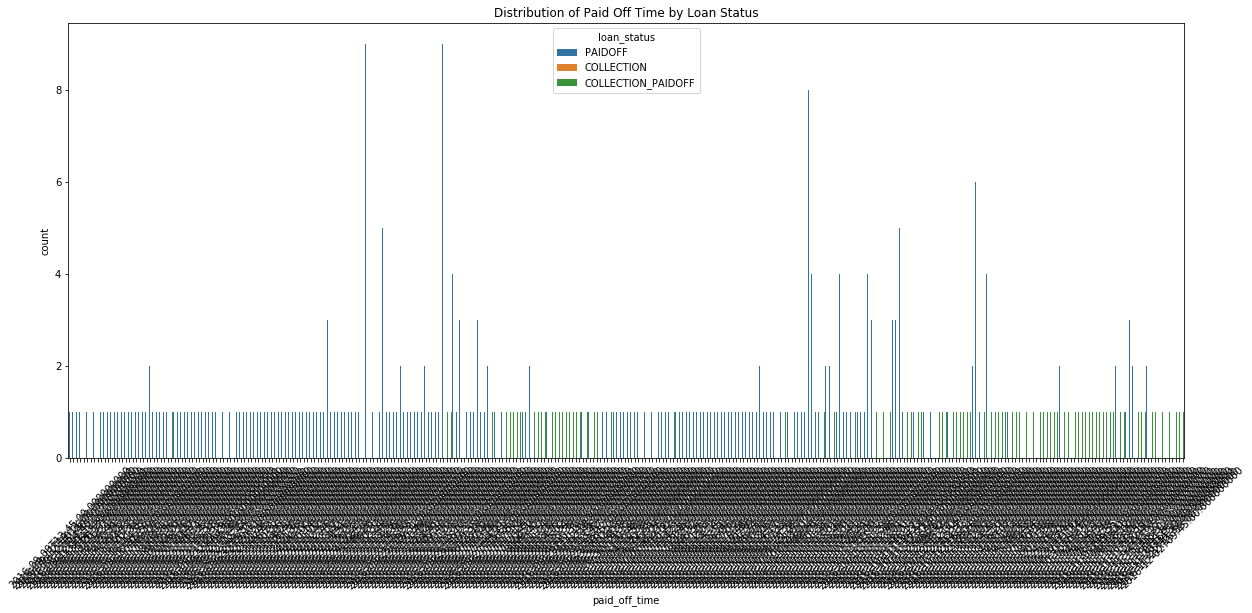

In [20]:
plt.figure(figsize=(20,8))
plt.title('Distribution of Paid Off Time by Loan Status')
plt.xticks(rotation=45)
sns.countplot(x='paid_off_time',hue='loan_status', data=ld)